<a href="https://colab.research.google.com/github/atharvgupta29/DS3001/blob/main/DS_3001_Project_Atharv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/Users/aryaadeshpande/Desktop/cleaned_nba_stats.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/aryaadeshpande/Desktop/cleaned_nba_stats.csv'

In [ ]:
df

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,TREB,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI
0,Total,NY,ACT,"Achiuwa, Precious, N.Y.",56,9,1137,156,309,.505,...,308,53,77,1,45,43,42,361,6.4,26
1,Total,HOU,ACT,"Adams, Steven, Hou.",57,3,777,89,163,.546,...,321,65,58,0,22,53,28,221,3.9,14
2,Total,MIA,ACT,"Adebayo, Bam, Mia.",78,78,2674,540,1113,.485,...,749,337,162,0,98,161,53,1410,18.1,34
3,Total,TOR,ACT,"Agbaji, Ochai, Tor.",63,44,1701,260,519,.501,...,240,97,120,1,54,53,29,653,10.4,24
4,Total,MEM,ACT,"Aldama, Santi, Mem.",65,16,1660,313,648,.483,...,416,188,76,0,52,71,29,811,12.5,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Total,PHI,ACT,"Yabusele, Guerschon, Phi.",70,43,1895,282,563,.501,...,395,148,164,1,58,87,24,768,11.0,28
734,Total,CHI,ACT,"Young, Jahmir, Chi.",5,0,21,3,4,.750,...,3,3,1,0,0,1,0,7,1.4,4
735,Total,ATL,ACT,"Young, Trae, Atl.",76,76,2739,566,1376,.411,...,236,880,145,0,91,355,12,1841,24.2,43
736,Total,LAC,ACT,"Zubac, Ivica, LA-C",79,79,2582,581,926,.627,...,993,211,168,2,54,127,89,1318,16.7,35


In [ ]:
df.columns

Index(['SCOPE', 'TM', 'RS', 'NAME', 'G', 'GS', 'MIN', 'FG', 'FGA', 'FG_PCT',
       'FG3', 'FG3A', 'FG3_PCT', 'FT', 'FTA', 'FT_PCT', 'OFF', 'DEF', 'TREB',
       'AST', 'PF', 'DQ', 'STL', 'TO', 'BLK', 'PTS', 'PPG', 'HI'],
      dtype='object')

In [ ]:
#checking the % of missing values per column
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Percentage of Missing Values per Column:\n")
print(missing_percent)


Percentage of Missing Values per Column:

Series([], dtype: float64)


No NaNs right now

In [ ]:
non_numeric_cols = ['NAME', 'TM', 'POS', 'SCOPE', 'RS']  # Add any others that shouldn't be numeric
numeric_candidate_cols = df.columns.difference(non_numeric_cols)

# Step 2: Convert them to numeric, coercing non-numeric to NaN
for col in numeric_candidate_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

after checking, for other instances, where there are non numeric inputs such as --- in columns which are supposed to be numeric

In [ ]:
# Total number of rows with at least one NaN
num_rows_with_nan = df.isna().any(axis=1).sum()

# Total number of rows in the DataFrame
total_rows = len(df)

# Percentage
percent_rows_with_nan = 100 * num_rows_with_nan / total_rows

print(f"Rows with at least one NaN: {num_rows_with_nan} out of {total_rows}")
print(f"Percentage: {percent_rows_with_nan:.2f}%")


Rows with at least one NaN: 38 out of 527
Percentage: 7.21%


dropping these rows with NaNs, as only 7% have them, and imputation doesn't make sense, as if we impute the numeric column with something like median, it wouldn't make sense as potentially with very little play time (less mins), might get extremely high 3pt % which logically doesnt make sense, also imputing based on the rows above or below doesnt make sense as data is arranged alphabetically by last name.


In [ ]:
df = df.dropna().reset_index(drop=True)


In [ ]:
#this cleans the name column, I'm removing the team abbreviation that is in our Name column
df['NAME'] = df['NAME'].apply(lambda x: x.rsplit(',', 1)[0].strip())


In [ ]:
df['SCOPE'].value_counts()

,count
SCOPE,
Total,564
Team,174


In [ ]:
df = df[df['SCOPE'].str.lower() != 'team']


we're only looking at the complete stats of a player, not considering traded players more than once (for every time they were traded)

In [ ]:
df['RS'].value_counts()

,count
RS,
ACT,527
NWT,37


In [ ]:
df = df[df['RS'].str.upper() != 'NWT']


In [ ]:
df['RS'].value_counts()

,count
RS,
ACT,527


we're only looking at the active players currently in the NBA, and not players who were on the team, didnt get any game time.

In [ ]:
df.to_csv("cleaned_nba_stats.csv", index=False)


NameError: name 'df' is not defined

**Working with cleaned data now**

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.shape

(489, 28)

In [ ]:
df_cleaned=pd.read_csv('/content/cleaned_nba_stats.csv')

In [ ]:
df_cleaned

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI,Starter
0,Total,NY,ACT,"Achiuwa, Precious",56,9,1137,156,309,0.505,...,53,77,1,45,43,42,361,6.4,26,0
1,Total,HOU,ACT,"Adams, Steven",57,3,777,89,163,0.546,...,65,58,0,22,53,28,221,3.9,14,0
2,Total,MIA,ACT,"Adebayo, Bam",78,78,2674,540,1113,0.485,...,337,162,0,98,161,53,1410,18.1,34,1
3,Total,TOR,ACT,"Agbaji, Ochai",63,44,1701,260,519,0.501,...,97,120,1,54,53,29,653,10.4,24,1
4,Total,MEM,ACT,"Aldama, Santi",65,16,1660,313,648,0.483,...,188,76,0,52,71,29,811,12.5,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Total,BRK,ACT,"Wilson, Jalen",78,21,1993,240,609,0.394,...,141,162,1,40,79,5,731,9.4,20,0
485,Total,NY,ACT,"Wright, Delon",39,7,614,43,125,0.344,...,74,23,0,34,22,12,120,3.1,12,0
486,Total,PHI,ACT,"Yabusele, Guerschon",70,43,1895,282,563,0.501,...,148,164,1,58,87,24,768,11.0,28,1
487,Total,ATL,ACT,"Young, Trae",76,76,2739,566,1376,0.411,...,880,145,0,91,355,12,1841,24.2,43,1


In [ ]:
df_cleaned['Starter'] = (df_cleaned['GS'] / df_cleaned['G'] >= 0.50).astype(int)


In [ ]:
df_cleaned

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI,Starter
0,Total,NY,ACT,"Achiuwa, Precious",56,9,1137,156,309,0.505,...,53,77,1,45,43,42,361,6.4,26,0
1,Total,HOU,ACT,"Adams, Steven",57,3,777,89,163,0.546,...,65,58,0,22,53,28,221,3.9,14,0
2,Total,MIA,ACT,"Adebayo, Bam",78,78,2674,540,1113,0.485,...,337,162,0,98,161,53,1410,18.1,34,1
3,Total,TOR,ACT,"Agbaji, Ochai",63,44,1701,260,519,0.501,...,97,120,1,54,53,29,653,10.4,24,1
4,Total,MEM,ACT,"Aldama, Santi",65,16,1660,313,648,0.483,...,188,76,0,52,71,29,811,12.5,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Total,BRK,ACT,"Wilson, Jalen",78,21,1993,240,609,0.394,...,141,162,1,40,79,5,731,9.4,20,0
485,Total,NY,ACT,"Wright, Delon",39,7,614,43,125,0.344,...,74,23,0,34,22,12,120,3.1,12,0
486,Total,PHI,ACT,"Yabusele, Guerschon",70,43,1895,282,563,0.501,...,148,164,1,58,87,24,768,11.0,28,1
487,Total,ATL,ACT,"Young, Trae",76,76,2739,566,1376,0.411,...,880,145,0,91,355,12,1841,24.2,43,1


In [ ]:
df_cleaned.columns

Index(['SCOPE', 'TM', 'RS', 'NAME', 'G', 'GS', 'MIN', 'FG', 'FGA', 'FG_PCT',
       'FG3', 'FG3A', 'FG3_PCT', 'FT', 'FTA', 'FT_PCT', 'OFF', 'DEF', 'TREB',
       'AST', 'PF', 'DQ', 'STL', 'TO', 'BLK', 'PTS', 'PPG', 'HI', 'Starter'],
      dtype='object')

In [ ]:
for col in df_cleaned.columns:
    print(col)


SCOPE
TM
RS
NAME
G
GS
MIN
FG
FGA
FG_PCT
FG3
FG3A
FG3_PCT
FT
FTA
FT_PCT
OFF
DEF
TREB
AST
PF
DQ
STL
TO
BLK
PTS
PPG
HI
Starter


# **EDA**

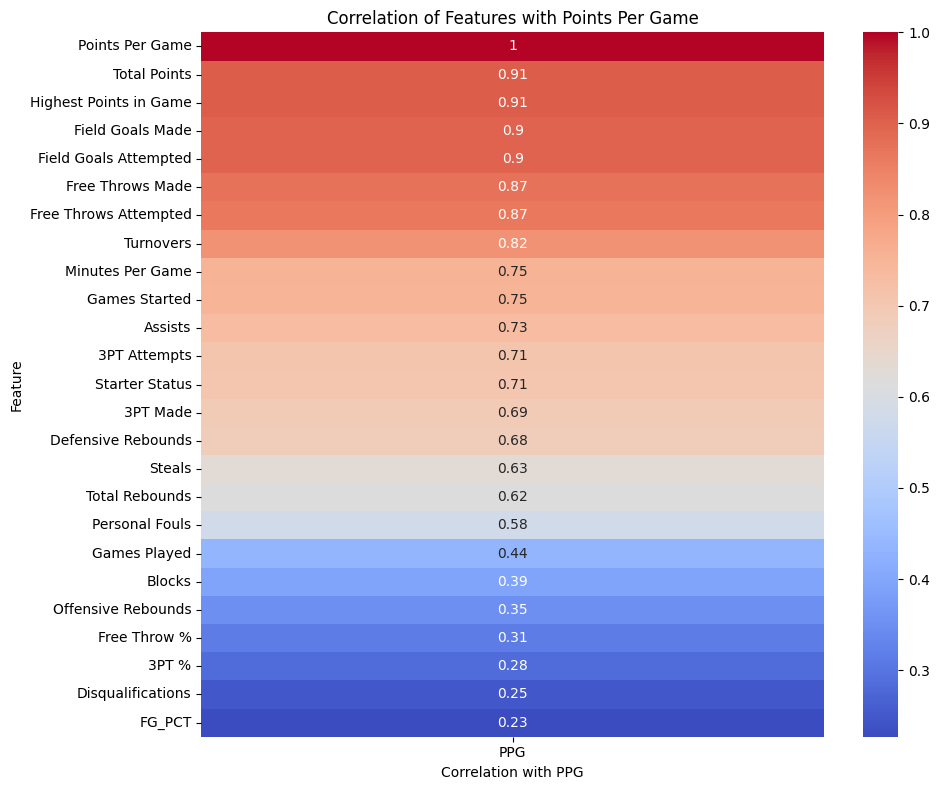

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the readable label mapping
label_map = {
    'PPG': 'Points Per Game',
    'PTS': 'Total Points',
    'HI': 'Highest Points in Game',
    'FG': 'Field Goals Made',
    'FGA': 'Field Goals Attempted',
    'FT': 'Free Throws Made',
    'FTA': 'Free Throws Attempted',
    'TO': 'Turnovers',
    'MIN': 'Minutes Per Game',
    'GS': 'Games Started',
    'AST': 'Assists',
    'FG3A': '3PT Attempts',
    'Starter': 'Starter Status',
    'FG3': '3PT Made',
    'DEF': 'Defensive Rebounds',
    'STL': 'Steals',
    'TREB': 'Total Rebounds',
    'PF': 'Personal Fouls',
    'G': 'Games Played',
    'BLK': 'Blocks',
    'OFF': 'Offensive Rebounds',
    'FT_PCT': 'Free Throw %',
    'FG3_PCT': '3PT %',
    'DQ': 'Disqualifications'  # If included
}

# Step 2: Compute correlation matrix
corr = df_cleaned.corr(numeric_only=True)

# Step 3: Prepare sorted Series for just PPG correlations
ppg_corr = corr[['PPG']].sort_values(by='PPG', ascending=False)

# Step 4: Rename the index (rows) using label_map for plotting
ppg_corr_readable = ppg_corr.rename(index=label_map)

# Step 5: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ppg_corr_readable, annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Points Per Game')
plt.ylabel('Feature')
plt.xlabel('Correlation with PPG')
plt.tight_layout()
plt.show()


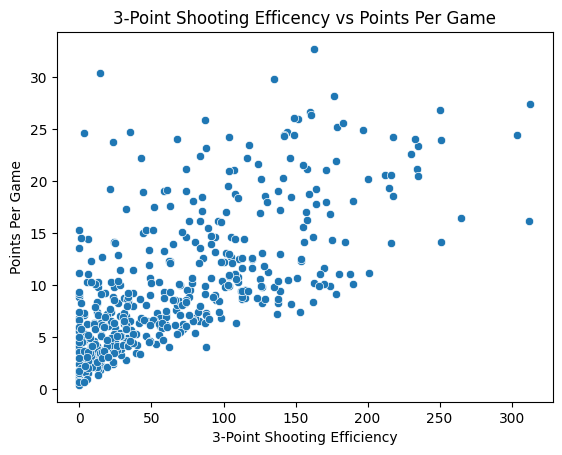

In [ ]:
sns.scatterplot(data=df_cleaned, x='FG3', y='PPG')
plt.title('3-Point Shooting Efficency vs Points Per Game')
plt.xlabel('3-Point Shooting Efficiency')
plt.ylabel('Points Per Game')
plt.show()

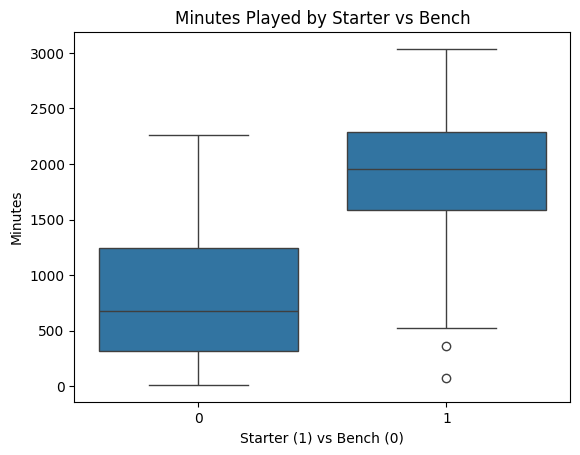

In [ ]:
sns.boxplot(data=df_cleaned, x='Starter', y='MIN')
plt.title('Minutes Played by Starter vs Bench')
plt.xlabel('Starter (1) vs Bench (0)')
plt.ylabel('Minutes')
plt.show()


<ipython-input-9-6f1f2f098175>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.index, y=top_teams.values, palette = 'viridis')


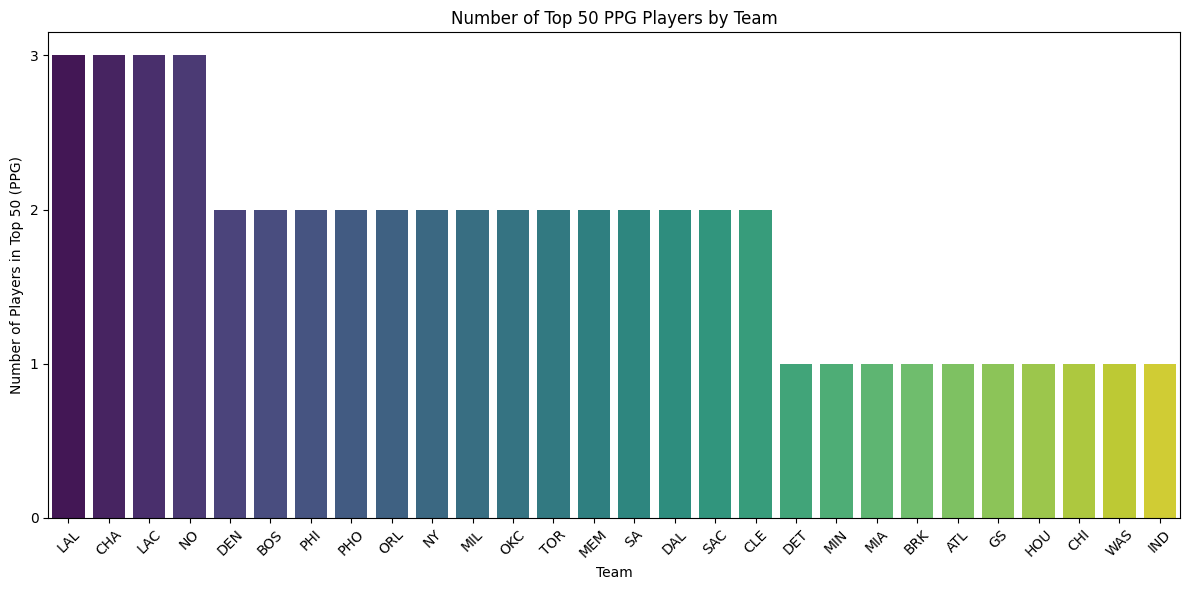

In [ ]:
import matplotlib.ticker as ticker
# Step 1: Get top 50 players by PPG
top_50 = df_cleaned.sort_values(by='PPG', ascending=False).head(50)

# Step 2: Count how many of them are from each team
top_teams = top_50['TM'].value_counts()

# Step 3: Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_teams.index, y=top_teams.values, palette = 'viridis')
plt.title('Number of Top 50 PPG Players by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players in Top 50 (PPG)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


<ipython-input-10-0bc3106d06a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=starter_counts.index, y=starter_counts.values, palette='coolwarm')


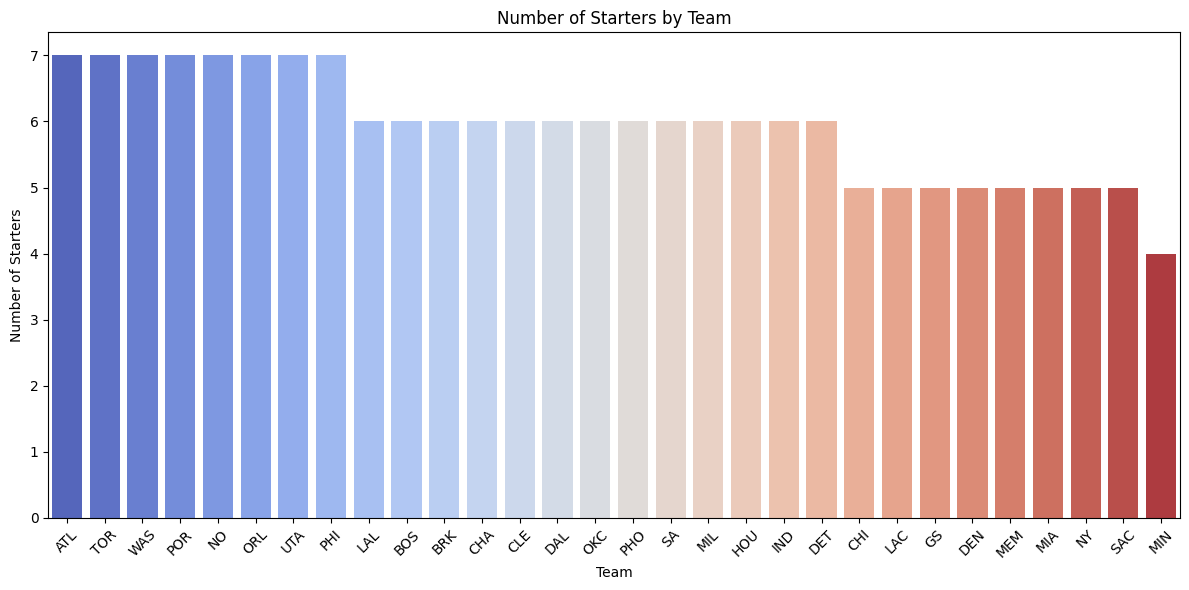

In [ ]:
starter_counts = df_cleaned.groupby('TM')['Starter'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=starter_counts.index, y=starter_counts.values, palette='coolwarm')

plt.title('Number of Starters by Team')
plt.xlabel('Team')
plt.ylabel('Number of Starters')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Whole numbers on y-axis

plt.tight_layout()
plt.show()

In [ ]:
avg_starters = starter_counts.mean()
print(f"Average number of starters per team: {avg_starters:.2f}")


Average number of starters per team: 5.93


# **PCA (Unsupervised)**

attack vs offense for players


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Define attack & defense features
attack_features = ['PTS', 'AST', 'FGA']
defense_features = ['TREB', 'STL', 'BLK']

# 2. Standardize them separately
attack_z = StandardScaler().fit_transform(df_cleaned[attack_features])
defense_z = StandardScaler().fit_transform(df_cleaned[defense_features])

# 3. Compute average standardized score for each player
df_cleaned['Attack_Score'] = attack_z.mean(axis=1)
df_cleaned['Defense_Score'] = defense_z.mean(axis=1)

# 4. Assign playstyle
df_cleaned['Playstyle'] = df_cleaned.apply(
    lambda row: 'Attack' if row['Attack_Score'] > row['Defense_Score'] else 'Defense',
    axis=1
)


In [ ]:
df_cleaned

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,STL,TO,BLK,PTS,PPG,HI,Starter,Attack_Score,Defense_Score,Playstyle
0,Total,NY,ACT,"Achiuwa, Precious",56,9,1137,156,309,0.505,...,45,43,42,361,6.4,26,0,-0.441947,0.519212,Defense
1,Total,HOU,ACT,"Adams, Steven",57,3,777,89,163,0.546,...,22,53,28,221,3.9,14,0,-0.647729,0.098445,Defense
2,Total,MIA,ACT,"Adebayo, Bam",78,78,2674,540,1113,0.485,...,98,161,53,1410,18.1,34,1,1.774777,2.130222,Defense
3,Total,TOR,ACT,"Agbaji, Ochai",63,44,1701,260,519,0.501,...,54,53,29,653,10.4,24,1,0.073295,0.310135,Defense
4,Total,MEM,ACT,"Aldama, Santi",65,16,1660,313,648,0.483,...,52,71,29,811,12.5,29,0,0.536807,0.634821,Defense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Total,BRK,ACT,"Wilson, Jalen",78,21,1993,240,609,0.394,...,40,79,5,731,9.4,20,0,0.324523,-0.119450,Attack
485,Total,NY,ACT,"Wright, Delon",39,7,614,43,125,0.344,...,34,22,12,120,3.1,12,0,-0.732004,-0.490302,Defense
486,Total,PHI,ACT,"Yabusele, Guerschon",70,43,1895,282,563,0.501,...,58,87,24,768,11.0,28,1,0.325142,0.592961,Defense
487,Total,ATL,ACT,"Young, Trae",76,76,2739,566,1376,0.411,...,91,355,12,1841,24.2,43,1,3.702508,0.486379,Attack


In [ ]:
df_cleaned['Playstyle'].value_counts()

,count
Playstyle,
Attack,246
Defense,243


In [ ]:
features = [
    'PTS', 'AST', 'FGA', 'FG3A', 'FT_PCT', 'FG_PCT', 'TREB',
    'STL', 'BLK', 'TO', 'PF', 'MIN'
]


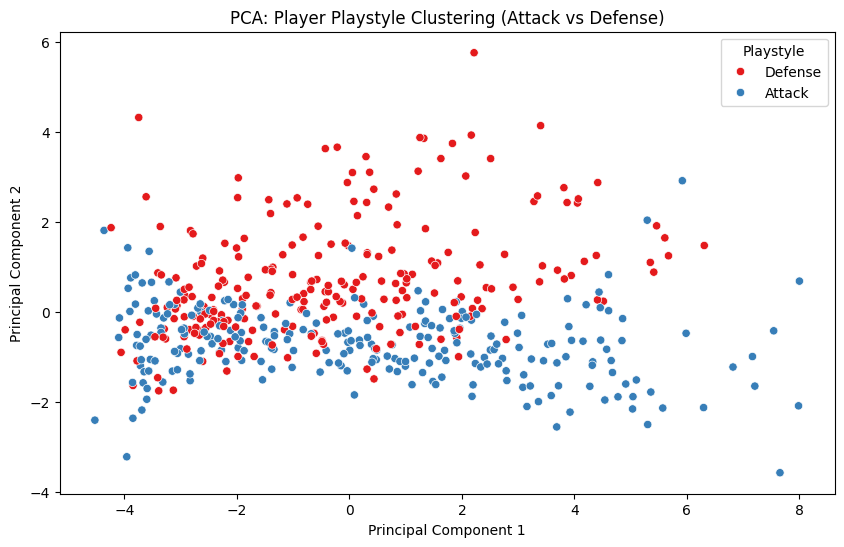

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Subset the DataFrame
X = df_cleaned[features]

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Create a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Playstyle'] = df_cleaned['Playstyle']  # attack/defense labels

# 5. Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Playstyle', palette='Set1')
plt.title('PCA: Player Playstyle Clustering (Attack vs Defense)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Playstyle')
plt.show()


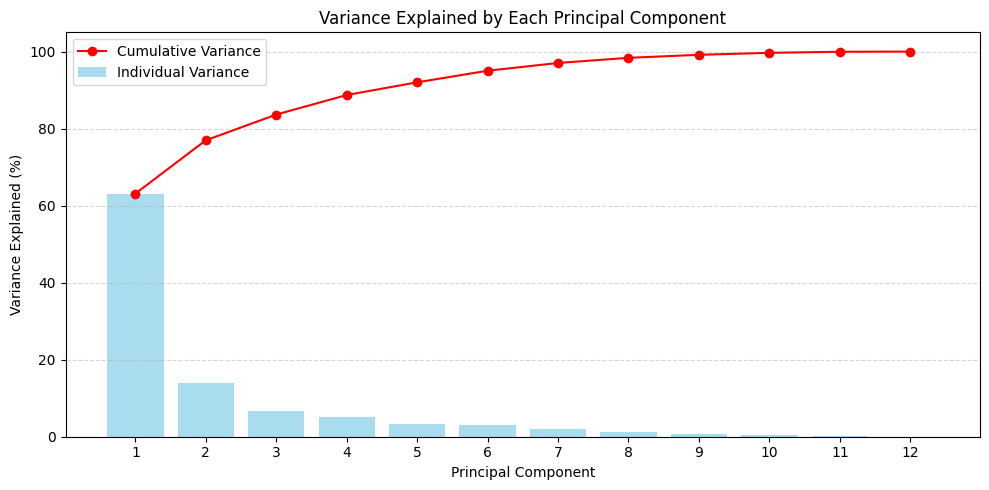

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Re-run PCA using all components
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# 2. Get individual and cumulative variance explained
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 3. Plot
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100,
        alpha=0.7, label='Individual Variance', color='skyblue')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100,
         marker='o', color='red', label='Cumulative Variance')

# Labels & styling
plt.xticks(range(1, len(explained_variance) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Variance Explained by Each Principal Component')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
df_cleaned.columns

Index(['SCOPE', 'TM', 'RS', 'NAME', 'G', 'GS', 'MIN', 'FG', 'FGA', 'FG_PCT',
       'FG3', 'FG3A', 'FG3_PCT', 'FT', 'FTA', 'FT_PCT', 'OFF', 'DEF', 'TREB',
       'AST', 'PF', 'DQ', 'STL', 'TO', 'BLK', 'PTS', 'PPG', 'HI', 'Starter',
       'Attack_Score', 'Defense_Score', 'Playstyle'],
      dtype='object')